# INFO204 Lab 5 - Feature Manipulation

For this lab we will take a look of PCA, using it for data visualisation and preprocessing. 
For code examples, refer to the relevant Sklearn documents, and material in previous lectures and labs. 

## Part 1. Preparation

Again, we use the "breast cancer" dataset for this lab. Now load it in, and assign "data" to variable X, "target" to variable y:

In [16]:
from sklearn import datasets
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import init_notebook_mode,plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [17]:
# to complete ...
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target
feat_names = dataset.feature_names

Now, use the "train_test_split" function to split X into X_tr / X_te, and y_tr / y_te for training and testing respectively. Specify these options: test_size=0.3, random_state=42.

In [18]:
# to complete ...
# Make a train/test split using 30% test size
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
# verify whether split is done correctly:
print X_tr.shape, X_te.shape

(398, 30) (171, 30)


# PCA transform for visualisation

**Task 1a.** Following examples given in Lecture 11, conduct the PCA tranform of X_tr, using the option n_components=2:

In [20]:
pca = PCA(n_components=2)
pc = pca.fit_transform(X_tr)

Now plot the new data "pc", using the old y_tr labels. 

In [21]:
# Plot the scatter plot, using class labels: 1 - 'ro', 0 - 'b+'.
df = pd.DataFrame(data=pc, columns=['PC1', 'PC2'])
df['Target_train'] = y_tr
df.head()

,PC1,PC2,Target_train
0,-173.142266,18.162997,1
1,-269.896445,40.628564,1
2,-62.496326,35.875609,1
3,-316.150759,25.631474,1
4,-175.427454,6.214322,1


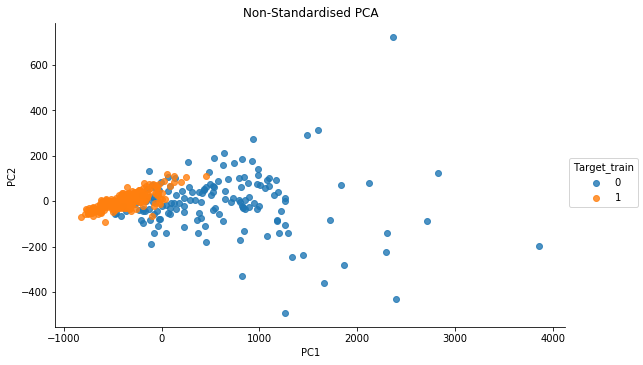

In [22]:
sns.lmplot(x='PC1', y='PC2', hue='Target_train', data=df, fit_reg=False, aspect=1.618034)
plt.title('Non-Standardised PCA')
plt.show()

**Task 1b.** Carry out standardization first on X_tr, and redo the PCA transform and visualization task. 

In [23]:
# your code for Task 2... import StandardScaler first
# carry out PCA transform 
#...
pca = PCA(n_components=2)
pc = pca.fit_transform(StandardScaler().fit_transform(X_tr))

pcdf = pd.DataFrame(data=pc, columns=['PC1', 'PC2'])
pcdf['Target_train'] = y_tr
pcdf.head()

,PC1,PC2,Target_train
0,-3.084842,-2.158704,1
1,-2.182647,-0.617571,1
2,2.049959,2.328953,1
3,-2.809267,-0.950791,1
4,-1.913537,-1.072582,1


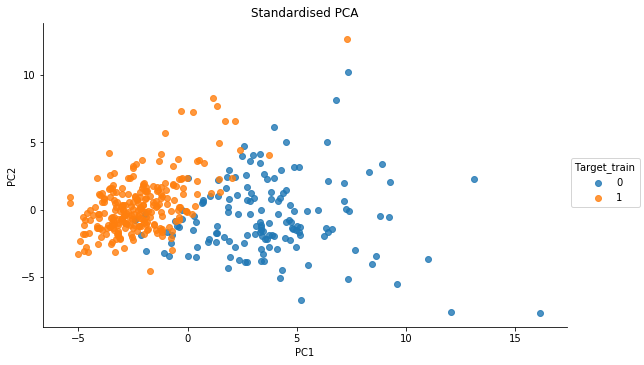

In [24]:
sns.lmplot(x='PC1', y='PC2', hue='Target_train', data=pcdf, fit_reg=False, aspect=1.618034)
plt.title('Standardised PCA')
plt.show()

**Comment** on your observations:
>- Before standardisation, the classes seemed to cross over alot because of their inconsistent scales.
>- Standardising the data made the seperation between the classes more apparent.

---
---

# Part 2. Classification

** Task 2a. ** Train a kNN classifier on X_tr and score it on X_te. Change the value for n_neighbors and find the best $k$ in the range of [1, 21].

In [25]:
# your code for Task 2a.
# Lets start again for practice
scores = []
for i in range(1,22):
    model = KNeighborsClassifier(n_neighbors=i).fit(X_tr, y_tr)
    scores.append(model.score(X_te, y_te))

trace = go.Scatter(
    x = range(1,22),
    y = scores,
    mode = 'markers'
)
data = [trace]
iplot(data, filename='scatter')

**Task 2b.** Using the best $k$, redo the classification experiment on the PCA-transformed data. To do this, you need to fit a PCA model with X_tr, use it to tranform *both* X_tr and X_te. Use the transformed training data to train your kNN, and test it on the transformed testing data. Generate a score curve for n_components values that go from 1 to 30. 

In [26]:
#best result when k=10

#standardise the full X data
X_tr = StandardScaler().fit_transform(X_tr)
X_te = StandardScaler().fit_transform(X_te)
scores = []

for i in range(1,31):
    pca = PCA(n_components=i)
    new_X_tr = pca.fit_transform(X_tr)
    new_X_te = pca.fit_transform(X_te)
    model = KNeighborsClassifier(n_neighbors=10).fit(new_X_tr, y_tr)
    scores.append(model.score(new_X_te, y_te))
    #print "PC = {}".format(i), new_X_tr

    
trace = go.Scatter(
    x = range(1,31),
    y = scores,
    mode = 'markers'
)
data = [trace]
iplot(data, filename='scatter')

** Comment** on your observations: 
>- It seems from the first figure that k=10 heeds the highest accuracy model.
>- Looking at the second figure, investigating how the number of PCs affect the accuracy of a model, it seems that more than 10 PCs doesn't improve the model accuracy.
>- We might say in this case, it could mean that further PCs after 10 do not contribute much variance, and hence not much to the discrimination of classes - so it all goes flat. 

---
---

## Part 3. Feature importance ranking using decision trees
For the last part of the lab, let's see if we can produce something similar to the feature importance graph introduced in Lecture 12. For this purpose we need to use the DecisionTreeClassifier. The following code does the job:

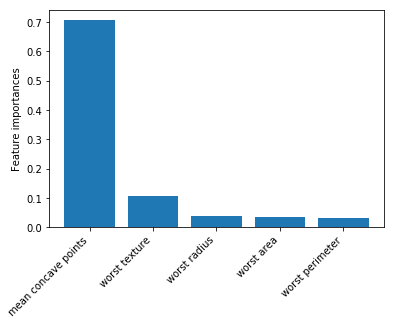

In [27]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_tr, y_tr)    # Train a DT and get the feature importance scores
imp_scores = clf.feature_importances_
ord = np.argsort(-imp_scores)     # sort the importance scores in descending order; take the order as indeces
plt.bar(range(5), imp_scores[ord[0:5]]) # display the first five most important features and their scores
plt.ylabel('Feature importances')  
plt.xticks(range(5), dataset['feature_names'][ord[0:5]], rotation=45, ha='right');

**Bonus Task. ** Conduct a 10-fold cross validation, each time train a DT and obtain the importance scores. Calculate the *average* importance score and display it. [0.5 marks]

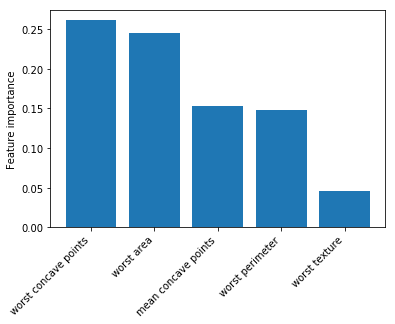

In [28]:
#An array mapping to each feature in the data
importance_array = np.zeros(shape=(30))

#define a split generator
ss = ShuffleSplit(n_splits=10, random_state=0, test_size=.3)

for train_index, test_index in ss.split(X):
    model = DecisionTreeClassifier().fit(X[train_index], y[train_index])
    imp_feat = model.feature_importances_
    #vector addition of this fold's discovered important features
    #to the total important features in the importance array of features
    importance_array += imp_feat

#then divide by the 10 folds(not absolutely necessary)
importance_array /= 10
ord = np.argsort(-importance_array)     
plt.bar(range(5), importance_array[ord[0:5]]) 
plt.ylabel('Feature importance')  
plt.xticks(range(5), dataset['feature_names'][ord[0:5]], rotation=45, ha='right');

>- ### Interestingly, after more trials, it seems the worst area feature is the most important - not the mean concave points.

#### END OF LAB 5.